# The aim of this project is to identify the customers that are more inclined to opt for credit card.

Variable Definition for train data

ID -->Unique Identifier for a row

Gender-->Gender of the Customer

Age-->Age of the Customer (in Years)

Region_Code-->Code of the Region for the customers

Occupation-->Occupation Type for the customer

Channel_Code-->Acquisition Channel Code for the Customer  (Encoded)

Vintage-->Vintage for the Customer (In Months)

Credit_Product-->If the Customer has any active credit product (Home loan,Personal loan, Credit Card etc.)

Avg_Account_Balance-->Average Account Balance for the Customer in last 12 Months

Is_Active-->If the Customer is Active in last 3 Months

Is_Lead(Target)-->If the Customer is interested for the Credit Card-->0 : Customer is not interested
                                                                   -->1 : Customer is interested

In [1]:
    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt
    plt.rc("font",size=14)
    import seaborn as sns
    sns.set(style="white")
    sns.set(style="whitegrid", color_codes=True)

In [2]:
import warnings
warnings.filterwarnings("ignore")


In [3]:
import os
os.getcwd()

'C:\\Users\\shafat\\Documents\\Python Project\\Hackathon'

In [4]:
test_data = pd.read_csv("test.csv")
train_data = pd.read_csv("train.csv")
train_data['train_test'] = 1
test_data['train_test'] = 0
test_data['Is_Lead'] = np.NaN

data = pd.concat([train_data, test_data], axis=0).reset_index(drop=True)
data.describe(include='all')

,Age,Avg_Account_Balance,Channel_Code,Credit_Product,Gender,ID,Is_Active,Is_Lead,Occupation,Region_Code,Vintage,train_test
count,351037.000000,3.510370e+05,351037,309190,351037,351037,351037,245725.000000,351037,351037,351037.000000,351037.000000
unique,NaN,NaN,4,2,2,351037,2,NaN,4,35,NaN,NaN
top,NaN,NaN,X1,No,Male,RVWUNEBF,No,NaN,Self_Employed,RG268,NaN,NaN
freq,NaN,NaN,148202,205965,191902,1,214087,NaN,144078,51059,NaN,NaN
mean,43.860716,1.130141e+06,NaN,NaN,NaN,NaN,NaN,0.237208,NaN,NaN,46.924244,0.699997
std,14.841932,8.569530e+05,NaN,NaN,NaN,NaN,NaN,0.425372,NaN,NaN,32.329303,0.458259
min,23.000000,2.079000e+04,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,7.000000,0.000000
25%,30.000000,6.041850e+05,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,20.000000,0.000000
50%,43.000000,8.951620e+05,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,32.000000,1.000000
75%,54.000000,1.368152e+06,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,73.000000,1.000000


In [5]:
data.head(3)

,Age,Avg_Account_Balance,Channel_Code,Credit_Product,Gender,ID,Is_Active,Is_Lead,Occupation,Region_Code,Vintage,train_test
0,73,1045696,X3,No,Female,NNVBBKZB,No,0.0,Other,RG268,43,1
1,30,581988,X1,No,Female,IDD62UNG,No,0.0,Salaried,RG277,32,1
2,56,1484315,X3,No,Female,HD3DSEMC,Yes,0.0,Self_Employed,RG268,26,1


In [6]:
data.isnull().sum()

Age                         0
Avg_Account_Balance         0
Channel_Code                0
Credit_Product          41847
Gender                      0
ID                          0
Is_Active                   0
Is_Lead                105312
Occupation                  0
Region_Code                 0
Vintage                     0
train_test                  0
dtype: int64

In [7]:
print("percent of missing values in age is %.2f"%((data['Credit_Product'].isnull().sum()/data.shape[0])*100))
data['Credit_Product'].value_counts()

percent of missing values in age is 11.92


No     205965
Yes    103225
Name: Credit_Product, dtype: int64

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 351037 entries, 0 to 351036
Data columns (total 12 columns):
Age                    351037 non-null int64
Avg_Account_Balance    351037 non-null int64
Channel_Code           351037 non-null object
Credit_Product         309190 non-null object
Gender                 351037 non-null object
ID                     351037 non-null object
Is_Active              351037 non-null object
Is_Lead                245725 non-null float64
Occupation             351037 non-null object
Region_Code            351037 non-null object
Vintage                351037 non-null int64
train_test             351037 non-null int64
dtypes: float64(1), int64(4), object(7)
memory usage: 32.1+ MB


In [9]:
#Replacing Credit product with unknwon
data['Credit_Product'].replace(np.NaN, 'unknown', inplace=True)
print(data['Credit_Product'].value_counts())

No         205965
Yes        103225
unknown     41847
Name: Credit_Product, dtype: int64


In [10]:
data.columns
cat_df=data[['Gender','Region_Code', 'Occupation', 'Channel_Code','Credit_Product', 'Is_Active']]
num_df=data[['Age','Vintage','Avg_Account_Balance']]



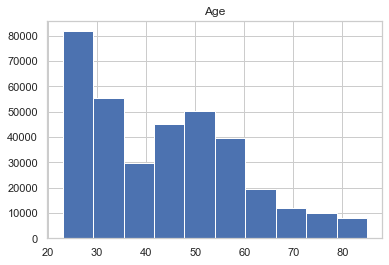

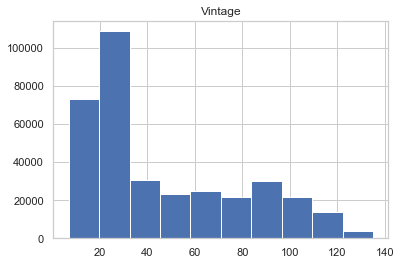

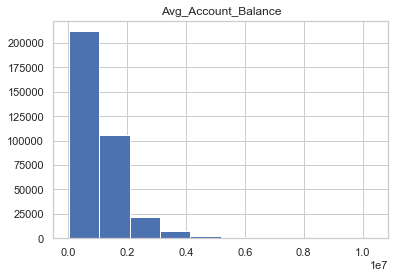

In [11]:
for i in num_df.columns:
    plt.hist(num_df[i])
    plt.title(i)
    plt.show()

Cramer's V correlation matrix

In [12]:
from sklearn import preprocessing

label = preprocessing.LabelEncoder()
data_encoded = pd.DataFrame() 

for i in cat_df.columns :
    data_encoded[i]=label.fit_transform(cat_df[i])

In [13]:
data_encoded.head()

,Gender,Region_Code,Occupation,Channel_Code,Credit_Product,Is_Active
0,0,18,1,2,0,0
1,0,27,2,0,0,0
2,0,18,3,2,0,1
3,1,20,2,0,0,0
4,0,32,2,0,0,0


In [14]:
from scipy.stats import chi2_contingency
import numpy as np




def cramers_V(var1,var2) :
    crosstab =np.array(pd.crosstab(var1,var2, rownames=None, colnames=None)) # Cross table building
    stat = chi2_contingency(crosstab)[0] # Keeping of the test statistic of the Chi2 test
    obs = np.sum(crosstab) # Number of observations
    mini = min(crosstab.shape)-1 # Take the minimum value between the columns and the rows of the cross table
    return (stat/(obs*mini))

In [15]:
rows= []

for var1 in data_encoded:
    col = []
    for var2 in data_encoded :
        cramers =cramers_V(data_encoded[var1], data_encoded[var2]) # Cramer's V test
        col.append(round(cramers,2)) # Keeping of the rounded value of the Cramer's V  
    rows.append(col)
cramers_results = np.array(rows)
df = pd.DataFrame(cramers_results, columns = data_encoded.columns, index =data_encoded.columns)

In [16]:
df

,Gender,Region_Code,Occupation,Channel_Code,Credit_Product,Is_Active
Gender,1.00,0.00,0.02,0.03,0.01,0.00
Region_Code,0.00,1.00,0.02,0.03,0.01,0.04
Occupation,0.02,0.02,1.00,0.13,0.03,0.05
Channel_Code,0.03,0.03,0.13,1.00,0.06,0.09
Credit_Product,0.01,0.01,0.03,0.06,1.00,0.01
Is_Active,0.00,0.04,0.05,0.09,0.01,1.00


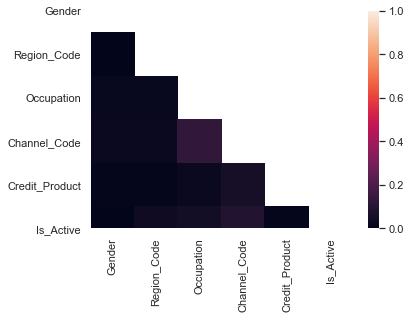

In [17]:
mask = np.zeros_like(df, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True




with sns.axes_style("white"):
    ax = sns.heatmap(df, mask=mask,vmin=0., vmax=1, square=True)

plt.show()

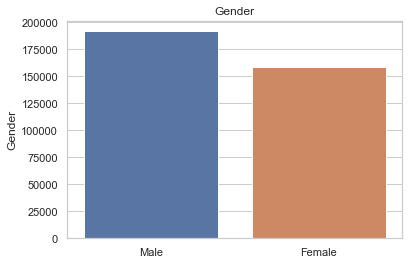

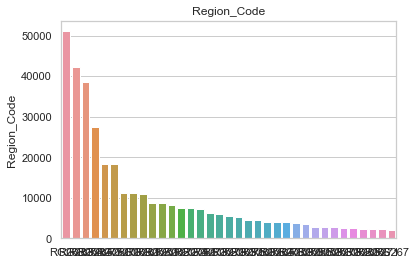

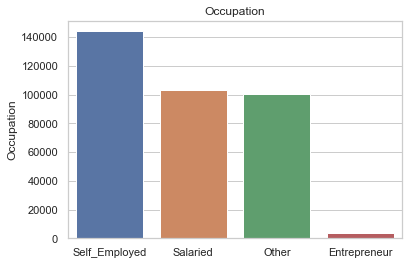

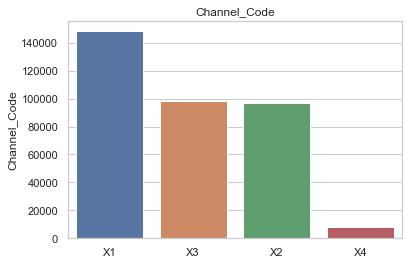

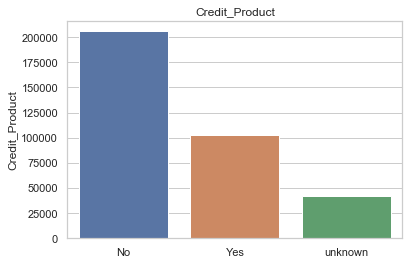

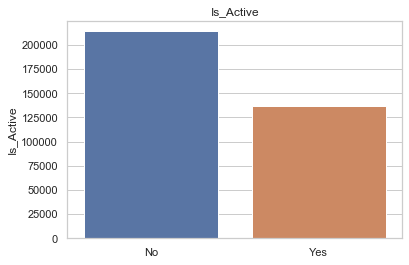

In [18]:
#barplots for all the categorical features
for i in cat_df.columns:
    sns.barplot(cat_df[i].value_counts().index,cat_df[i].value_counts()).set_title(i)
    plt.show()

In [19]:
print(pd.pivot_table(data, index = 'Is_Lead', columns = 'Occupation', values = 'Avg_Account_Balance' ,aggfunc ='count'))
print()
print(pd.pivot_table(data, index = 'Is_Lead', columns = 'Gender', values = 'Avg_Account_Balance' ,aggfunc ='count'))
print()
print(pd.pivot_table(data, index = 'Is_Lead', columns = 'Region_Code', values = 'Avg_Account_Balance' ,aggfunc ='count'))
print()
print(pd.pivot_table(data, index = 'Is_Lead', columns = 'Is_Active', values = 'Avg_Account_Balance' ,aggfunc ='count'))
print()
print(pd.pivot_table(data, index = 'Is_Lead', columns = 'Credit_Product', values = 'Avg_Account_Balance' ,aggfunc ='count'))
print()
print(pd.pivot_table(data, index = 'Is_Lead', columns = 'Channel_Code', values = 'Avg_Account_Balance' ,aggfunc ='count'))

Occupation  Entrepreneur  Other  Salaried  Self_Employed
Is_Lead                                                 
0.0                  905  52984     60503          73045
1.0                 1762  17189     11496          27841

Gender   Female   Male
Is_Lead               
0.0       88823  98614
1.0       22705  35583

Region_Code  RG250  RG251  RG252  RG253  RG254  RG255  RG256  RG257  RG258  \
Is_Lead                                                                      
0.0           2103   4569   3694   1377  21127   1549   2446   4931   1521   
1.0            393   1381    592    481   5713    469    401   1170    430   

Region_Code  RG259  ...  RG275  RG276  RG277  RG278  RG279  RG280  RG281  \
Is_Lead             ...                                                    
0.0           2085  ...   2702   1996   9851   1422   3079   9766   3979   
1.0            501  ...    543    768   2975    400    897   3009   1114   

Region_Code  RG282  RG283  RG284  
Is_Lead                  

In [20]:
num_df.corr()

,Age,Vintage,Avg_Account_Balance
Age,1.000000,0.628558,0.142563
Vintage,0.628558,1.000000,0.166611
Avg_Account_Balance,0.142563,0.166611,1.000000


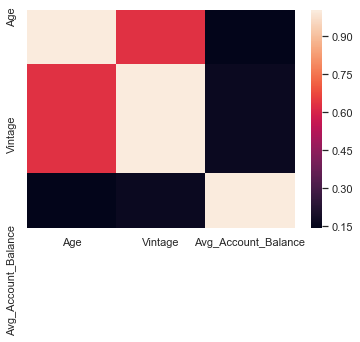

In [21]:
sns.heatmap(num_df.corr())

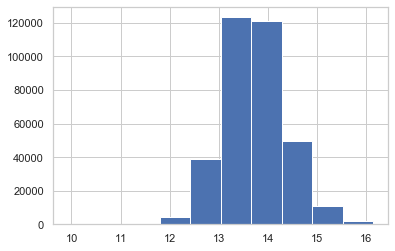

In [22]:
data['Avg_Account_Balance'] = np.log(data.Avg_Account_Balance+1)
data['Avg_Account_Balance'].hist()



In [23]:
data.columns

Index(['Age', 'Avg_Account_Balance', 'Channel_Code', 'Credit_Product',
       'Gender', 'ID', 'Is_Active', 'Is_Lead', 'Occupation', 'Region_Code',
       'Vintage', 'train_test'],
      dtype='object')

In [24]:
#created dummy variables from categories (also can use OneHotEncoder)
data_dummy = pd.get_dummies(data[['Age', 'Avg_Account_Balance', 'Channel_Code', 'Credit_Product',
       'Gender','Is_Active', 'Is_Lead', 'Occupation', 'Region_Code',
       'Vintage', 'train_test']])

In [25]:
X_train = data_dummy[data_dummy.train_test == 1].drop(['train_test'], axis =1)
X_test = data_dummy[data_dummy.train_test == 0].drop(['train_test'], axis =1)

In [26]:
y_train = data[data.train_test==1].Is_Lead
y_train.shape

(245725,)

In [27]:
y_train.head(4)

0    0.0
1    0.0
2    0.0
3    0.0
Name: Is_Lead, dtype: float64

In [28]:
from sklearn.preprocessing import StandardScaler ,LabelEncoder, OneHotEncoder
from sklearn.linear_model import LogisticRegression 
from sklearn import svm 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.naive_bayes import GaussianNB 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split 
from sklearn import metrics 
from sklearn.metrics import confusion_matrix ,classification_report

In [29]:
scale = StandardScaler()
data_dummies_scaled = data_dummy.copy()
data_dummies_scaled[['Age','Avg_Account_Balance','Vintage']]= scale.fit_transform(data_dummies_scaled[['Age','Avg_Account_Balance','Vintage']])
data_dummies_scaled

X_train_scaled = data_dummies_scaled[data_dummies_scaled.train_test == 1].drop(['train_test'], axis =1)
X_test_scaled = data_dummies_scaled[data_dummies_scaled.train_test == 0].drop(['train_test'], axis =1)

y_train = data[data.train_test==1].Is_Lead

#print('train shape: {}'.format(train_data.shape))
#print('test shape: {}'.format(test_data.shape))

In [30]:
X_train_scaled.columns

Index(['Age', 'Avg_Account_Balance', 'Is_Lead', 'Vintage', 'Channel_Code_X1',
       'Channel_Code_X2', 'Channel_Code_X3', 'Channel_Code_X4',
       'Credit_Product_No', 'Credit_Product_Yes', 'Credit_Product_unknown',
       'Gender_Female', 'Gender_Male', 'Is_Active_No', 'Is_Active_Yes',
       'Occupation_Entrepreneur', 'Occupation_Other', 'Occupation_Salaried',
       'Occupation_Self_Employed', 'Region_Code_RG250', 'Region_Code_RG251',
       'Region_Code_RG252', 'Region_Code_RG253', 'Region_Code_RG254',
       'Region_Code_RG255', 'Region_Code_RG256', 'Region_Code_RG257',
       'Region_Code_RG258', 'Region_Code_RG259', 'Region_Code_RG260',
       'Region_Code_RG261', 'Region_Code_RG262', 'Region_Code_RG263',
       'Region_Code_RG264', 'Region_Code_RG265', 'Region_Code_RG266',
       'Region_Code_RG267', 'Region_Code_RG268', 'Region_Code_RG269',
       'Region_Code_RG270', 'Region_Code_RG271', 'Region_Code_RG272',
       'Region_Code_RG273', 'Region_Code_RG274', 'Region_Code_RG27

In [31]:
X_train_scaled.drop('Is_Lead', axis=1, inplace=True)
X_train_scaled.drop('Gender_Male', axis=1, inplace=True)


In [32]:
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [33]:
lr = LogisticRegression(max_iter = 2000)
lr_cv = cross_val_score(lr,X_train_scaled,y_train,cv=5)
print(lr_cv)
print(lr_cv.mean())

[0.85321288 0.85335531 0.85351511 0.85361387 0.85377666]
0.853494763749481


In [34]:
dt = tree.DecisionTreeClassifier(random_state = 1)
dt_cv = cross_val_score(dt,X_train_scaled,y_train,cv=5)
print(dt_cv)
print(dt_cv.mean())

[0.78934196 0.78700199 0.7855733  0.78961826 0.78949617]
0.7882063394871685


In [35]:
knn = KNeighborsClassifier()
knn_cv = cross_val_score(knn,X_train,y_train,cv=5)
print(knn_cv)
print(knn_cv.mean())

[0.9306556  0.92957718 0.92943331 0.93232134 0.93044929]
0.930487343729199


In [36]:
knn = KNeighborsClassifier()
knn_cv_scaled = cross_val_score(knn,X_train_scaled,y_train,cv=5)
print(knn_cv_scaled)
print(knn_cv_scaled.mean())

[0.84295772 0.84283563 0.84104182 0.84067231 0.84472163]
0.8424458219578549


In [37]:
rf = RandomForestClassifier(random_state = 1)
rf_cv_scaled = cross_val_score(rf,X_train_scaled,y_train,cv=5)
print(rf_cv_scaled)
print(rf_cv_scaled.mean())

[0.84623367 0.84582672 0.84537593 0.84364317 0.84789598]
0.8457950940228255


In [38]:
print(f'{lr_cv.mean()} is the value obained by the logistic regression')
print()
print(f'{dt_cv.mean()} is the value obained by the decision tree classifier')
print()
print(f'{knn_cv.mean()} is the value obained by the k-nearest neighbors classifier')
print()
print(f'{rf_cv_scaled.mean()} is the value obained by the random forest scaled classifier')
print()


0.853494763749481 is the value obained by the logistic regression

0.7882063394871685 is the value obained by the decision tree classifier

0.930487343729199 is the value obained by the k-nearest neighbors classifier

0.8457950940228255 is the value obained by the random forest scaled classifier



In [39]:
def clf_performance(classifier, model_name):
    print(model_name)
    print('Best Score: ' + str(classifier.best_score_))
    print('Best Parameters: ' + str(classifier.best_params_))

In [40]:
from sklearn.model_selection import GridSearchCV 
from sklearn.model_selection import RandomizedSearchCV 

lr = LogisticRegression()
param_grid = {'max_iter' : [2000],
              'penalty' : ['l1', 'l2'],
              'C' : np.logspace(-4, 4, 20),
              'solver' : ['liblinear']}

clf_lr = GridSearchCV(lr, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)
best_clf_lr = clf_lr.fit(X_train_scaled,y_train)
clf_performance(best_clf_lr,'Logistic Regression')

Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed: 17.6min
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed: 18.1min finished


Logistic Regression
Best Score: 0.8534988299928782
Best Parameters: {'C': 11.288378916846883, 'max_iter': 2000, 'penalty': 'l2', 'solver': 'liblinear'}


In [46]:
test_data.describe()

,Age,Vintage,Avg_Account_Balance,train_test,Is_Lead
count,105312.000000,105312.000000,1.053120e+05,105312.0,0.0
mean,43.871002,46.842819,1.134195e+06,0.0,NaN
std,14.872890,32.273634,8.662430e+05,0.0,NaN
min,24.000000,7.000000,2.259700e+04,0.0,NaN
25%,30.000000,20.000000,6.039822e+05,0.0,NaN
50%,43.000000,32.000000,8.966345e+05,0.0,NaN
75%,54.000000,73.000000,1.371598e+06,0.0,NaN
max,85.000000,135.000000,9.908858e+06,0.0,NaN


In [67]:

X_test_scaled=X_test_scaled.drop(['Is_Lead'], axis =1)

In [68]:
X_test_scaled=X_test_scaled.drop(['Gender_Male'], axis=1)

In [70]:
y_hat_lr = best_clf_lr.best_estimator_.predict(X_test_scaled).astype(int)
#y_hat_xgb.size best_clf_lr
sample_submission = pd.DataFrame({'ID': test_data.ID, 'Is_Lead': y_hat_lr})
sample_submission.to_csv('sample_submission.csv', index=False)

In [ ]:
knn = KNeighborsClassifier()
param_grid = {'n_neighbors' : [2,4,6,8],
              'weights' : ['uniform', 'distance'],
              'algorithm' : ['auto', 'ball_tree','kd_tree'],
              'p' : [1,2]}
clf_knn = GridSearchCV(knn, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)
best_clf_knn = clf_knn.fit(X_train_scaled,y_train)
clf_performance(best_clf_knn,'KNN')

In [ ]:
rf = RandomForestClassifier(random_state = 1)
param_grid =  {'n_estimators': [400,450,500,550],
               'criterion':['gini','entropy'],
                                  'bootstrap': [True],
                                  'max_depth': [15, 20, 25],
                                  'max_features': ['auto','sqrt', 10],
                                  'min_samples_leaf': [2,3],
                                  'min_samples_split': [2,3]}
                                  
clf_rf = GridSearchCV(rf, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)
best_clf_rf = clf_rf.fit(X_train_scaled,y_train)
clf_performance(best_clf_rf,'Random Forest')

Fitting 5 folds for each of 288 candidates, totalling 1440 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
